In [1]:
import praw
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import operator
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter

In [2]:
# Create Reddit Client
reddit = praw.Reddit(client_id='EyFJRg2jwS3TLg', client_secret='3h6jZqoRIkFiUHttNCBMKcVWP64', user_agent='Comment Extraction by Showpaca')

# Grab the submission by id
submission = reddit.submission(id='azge71')

In [3]:
companies_names = ['hulu', 'disney', 'cbs', 'netflix', 
                   'amazon', 'sling', 'philo', 'youtube tv', 
                   'directv now', 'playstation vue']
comp_list = ['hulu', 
             'disney', 
             'cbs', 
             'netflix', 
             'amazon', 
             'sling', 'slingtv',
             'philo',
             'youtube', 'yttv', 'youtubetv',
             'directv', 'dtvn', 'dtv', 'dtvnow',
             'playstation', 'ps', 'vue', 'psvue', 'pv']

In [4]:
def get_sentiments(sub):
    # Extract all comments and their replies
    # Format is top-level comments, followed by second-level, followed by third-level, etc...
    sub.comments.replace_more(limit=None)
    
    # Removes stop words from comments
    # filtered_sub = filter_sub(sub)
    
    # Displays graph of top word counts in entire submission
    #print('Most Frequent Words:')
    display_word_counts(sub)
    
    # Analyze sentiment
    #print('\nSentiment by Comments:')
    #sentiments = analyze_sentiment(sub)
    #print('\nSentiment by Sentence:')
    sentiments = analyze_sentiment_sentence(sub)
    return(sentiments)
    

In [5]:
def filter_sub(sub):
    filtered_sub = []
    for comment in sub.comments.list():
        filtered_sub.append(filter_comm(TextBlob(comment.body)))
    return filtered_sub

In [6]:
def filter_text(text):
    stops = stopwords.words("english")
    stops.append(chr(8217)) # right apostrophe
    stops.append("`")
    stops.append("n't")
    stops.append("'s")
    filtered_text = [word for word in text.words if word.lower() not in stops]
    return filtered_text

In [7]:
def display_word_counts(sub):
    sub_all_text = ""
    for comment in sub.comments.list():
        sub_all_text += comment.body
    blob_total = TextBlob(sub_all_text)
    filtered_blob = filter_text(blob_total)
    word_counts = {}
    for word in filtered_blob:
        if not word.lower() in word_counts.keys():
            word_counts[word.lower()] = filtered_blob.count(word)
    sorted_counts = sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True)
    
    words = [word[0] for word in sorted_counts]
    counts = [word[1] for word in sorted_counts]

    '''df = pd.DataFrame(counts[:10], index=words[:10], columns=['Count'])
    df.plot(kind='bar',rot=45,figsize=(10,4))
    plt.show()'''

In [8]:
def analyze_sentiment(sub):
    text = [TextBlob(comment.body) for comment in sub.comments.list()]
    sents = []
    counts_freq = []
    hulu_sents = []
    disney_sents = []
    cbs_sents = []
    netflix_sents = []
    amazon_sents = []
    sling_sents = []
    philo_sents = []
    youtube_sents = []
    directv_sents = []
    playstation_sents = []
    
    for comment in text:
        filtered_text = [word for word in comment.words if word.lower() in comp_list]
        counts = {}
        sents.append(get_sentiment(comment))
        pol = get_sentiment(comment).polarity
        for word in filtered_text:
            if not word.lower() in counts.keys():
                word_low = word.lower()
                counts[word_low] = filtered_text.count(word)
                if (word_low == 'hulu'):
                    hulu_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'disney'):
                    disney_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'cbs'):
                    cbs_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'netflix'):
                    netflix_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'amazon'):
                    amazon_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'sling' or word_low == 'slingtv'):
                    sling_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'philo'):
                    philo_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'youtube' or word_low == 'yttv' or word_low == 'youtubetv'):
                    youtube_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'directv' 
                      or word_low == 'dtvn' 
                      or word_low == 'dtv'
                      or word_low == 'dtvnow'):
                    directv_sents.append([pol, filtered_text.count(word)])
                elif (word_low == 'playstation' 
                      or word_low == 'ps' 
                      or word_low == 'vue' 
                      or word_low == 'psvue'
                      or word_low == 'pv'):
                    playstation_sents.append([pol, filtered_text.count(word)])
            
        sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
        
        str_counts = []
        for count in sort_counts:
            str_counts.append(count[0] + ': ' + str(count[1]))
        cat_counts = '; '.join(str_counts)
        counts_freq.append(cat_counts)
        
    
    tot_sents = [get_total_sent(hulu_sents), 
                 get_total_sent(disney_sents), 
                 get_total_sent(cbs_sents),
                 get_total_sent(netflix_sents),
                 get_total_sent(amazon_sents),
                 get_total_sent(sling_sents),
                 get_total_sent(philo_sents),
                 get_total_sent(youtube_sents),
                 get_total_sent(directv_sents),
                 get_total_sent(playstation_sents)]
    
    '''sents_df = pd.DataFrame(tot_sents, index=companies_names, columns=['Sentiment Density'])
    sorted_sents = sents_df.sort_values(by='Sentiment Density', ascending=False)
    print(sorted_sents)
    sorted_sents.plot(kind='bar',rot=45,figsize=(10,4))
    plt.show()'''
    
    #return pd.DataFrame(sents[:20], index=counts_freq[:20])
    return tot_sents

In [9]:
def analyze_sentiment_sentence(sub):
    text = [TextBlob(comment.body) for comment in sub.comments.list()]
    sents = []
    counts_freq = []
    hulu_sents = []
    disney_sents = []
    cbs_sents = []
    netflix_sents = []
    amazon_sents = []
    sling_sents = []
    philo_sents = []
    youtube_sents = []
    directv_sents = []
    playstation_sents = []
    sent_count = 0
    
    for comment in text:
        for sentence in comment.sentences:
            filtered_text = [word for word in sentence.words if word.lower() in comp_list]
            counts = {}
            sents.append(get_sentiment(sentence))
            pol = get_sentiment(sentence).polarity
            for word in filtered_text:
                if not word.lower() in counts.keys():
                    word_low = word.lower()
                    counts[word_low] = filtered_text.count(word)
                    sent_count += 1
                    if (word_low == 'hulu'):
                        hulu_sents.append([pol, str(sentence)])
                    elif (word_low == 'disney'):
                        disney_sents.append([pol, str(sentence)])
                    elif (word_low == 'cbs'):
                        cbs_sents.append([pol, str(sentence)])
                    elif (word_low == 'netflix'):
                        netflix_sents.append([pol, str(sentence)])
                    elif (word_low == 'amazon'):
                        amazon_sents.append([pol, str(sentence)])
                    elif (word_low == 'sling' or word_low == 'slingtv'):
                        sling_sents.append([pol, str(sentence)])
                    elif (word_low == 'philo'):
                        philo_sents.append([pol, str(sentence)])
                    elif (word_low == 'youtube' or word_low == 'yttv' or word_low == 'youtubetv'):
                        youtube_sents.append([pol, str(sentence)])
                    elif (word_low == 'directv' or word_low == 'dtvn' or word_low == 'dtv'):
                        directv_sents.append([pol, str(sentence)])
                    elif (word_low == 'playstation' 
                          or word_low == 'ps' 
                          or word_low == 'vue' 
                          or word_low == 'psvue'
                          or word_low == 'pv'):
                        playstation_sents.append([pol, str(sentence)])
                    else:
                        sent_count = sent_count - 1

            sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)

            str_counts = []
            for count in sort_counts:
                str_counts.append(count[0] + ': ' + str(count[1]))
            cat_counts = '; '.join(str_counts)
            counts_freq.append(cat_counts)
        
    sent_list = [hulu_sents,
                 disney_sents,
                 cbs_sents,
                 netflix_sents,
                 amazon_sents,
                 sling_sents,
                 philo_sents,
                 youtube_sents,
                 directv_sents,
                 playstation_sents]
    
    '''tot_sents = [get_total_sent(hulu_sents), 
                 get_total_sent(disney_sents), 
                 get_total_sent(cbs_sents),
                 get_total_sent(netflix_sents),
                 get_total_sent(amazon_sents),
                 get_total_sent(sling_sents),
                 get_total_sent(philo_sents),
                 get_total_sent(youtube_sents),
                 get_total_sent(directv_sents),
                 get_total_sent(playstation_sents)]'''
    
    '''sents_df = pd.DataFrame(tot_sents, index=companies_names, columns=['Sentiment Density'])
    sorted_sents = sents_df.sort_values(by='Sentiment Density', ascending=False)
    print(sorted_sents)
    sorted_sents.plot(kind='bar',rot=45,figsize=(10,4))
    plt.show()'''
    
    return sent_list

In [10]:
def get_total_sent(serv):
    count = 1
    tot_sent = 0.0
    def sort_func(e):
        return e[0]
    
    serv.sort(reverse=True, key=sort_func)
    
    best = [b[1] for b in serv[:3]]
    worst = [w[1] for w in serv[-3:]]
    worst[::-1]
    
    for sent in serv:
        sentiment = sent[0]
        tot_sent += sentiment
        count += 1
    return tot_sent

In [11]:
def get_sentiment(text):
    return text.sentiment

In [12]:
subreddit = reddit.subreddit('cordcutters')

best: 

[[0.8, 'YouTube TV is great for that.'], [0.8, 'That’s great for all the stuff that YoutubeTV covers.'], [0.7, 'For services with good apps and still-good video quality, I believe all YouTube TV and PlayStation Vue channels are 60fps.']]

worst: 

[[-0.125, "I'm no expert, but according to wikipedia, there's a number of different de-interlacing methods, and I'm not sure which one YTTV uses."], [-0.15000000000000002, '**Youtube** \\- CBS and CW shows are swapped with forced commercial VOD options overnight.'], [-0.25, 'No more “is mtv on YouTube tv?']]


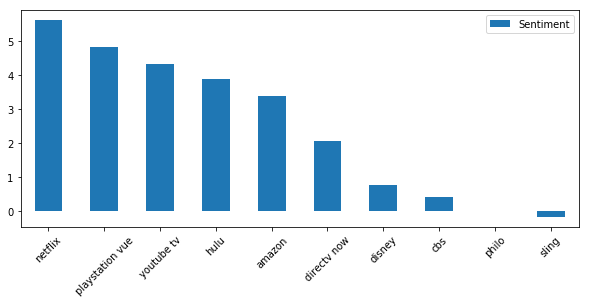

In [13]:
combined_sentiments = [[], [], [], [], [], [], [], [], [], []]
for submission in subreddit.new(limit=25):
    #print(submission.title)
    sub_sent = get_sentiments(submission)
    for i in range(0, len(sub_sent)):
        if (len(sub_sent[i]) > 1):
            for j in range(0, len(sub_sent[i])):
                combined_sentiments[i].append(sub_sent[i][j])

total_sents = [0] * len(companies_names)
# [service][0 - list of entries for submission][entry][polarity, sentence]


youtube_comms = combined_sentiments[7]
youtube_comms.sort(key=itemgetter(0), reverse=True)
top_youtube_best = youtube_comms[:3]
top_youtube_worst = youtube_comms[-3:]

print("best: \n")
print(top_youtube_best)
print("\nworst: \n")
print(top_youtube_worst)

for i in range(0, len(combined_sentiments)):
    for j in range(0, len(combined_sentiments[i])):
        total_sents[i] += combined_sentiments[i][j][0]

        
        
comb_sents_df = pd.DataFrame(total_sents, index=companies_names, columns=['Sentiment'])
sorted_comb_sents = comb_sents_df.sort_values(by='Sentiment', ascending=False)
sorted_comb_sents.plot(kind='bar',rot=45,figsize=(10,4))
plt.show()
#print(combined_sentiments)

In [14]:
# Pull Reddit submissions
# Store submission id's in dictionary to prevent duplicates
# Append dictionary of sentiments (sent_density: , num_mentions: , recent: , top_best: , top_worst: )
# Repeat for Twitter comments

In [15]:
combined_sentiments[0][0]

[0.2875, 'I’m pretty sure it’s only available on Hulu and PSVue.']